In [2]:
#Importing required python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#importing our csv file on new dataframe named as df
df=pd.read_csv('StudentScores.csv')
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [6]:
#describe() function gives us the numeric values of the given dataset such as mean,median and so on
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [7]:
#info() function provides detail about the datatype a column contains and counts the not null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [10]:
#isna() function checks are there any null values in our dataset 
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

## Drop Column That You Don't Require

In [25]:
df_cleaned=df.drop('Unnamed: 0',axis=1) #axis means you are deleting your column vertically
 #Now the Column name Unnamed:0 is deleted
#If you run this line of code again it throws error as the column has already been deleted

In [26]:
print(df_cleaned.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female     missing   bachelor's degree      standard     none   
1  female     group C        some college      standard  missing   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0        missing   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0        missing   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


In [27]:
#For non numerical columns with missing values fill it with missing
categorical_cols = ["EthnicGroup", "ParentEduc", "TestPrep", "ParentMaritalStatus","PracticeSport", "IsFirstChild", "TransportMeans", "WklyStudyHours"]
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna("missing")
print(df[categorical_cols].head())

  EthnicGroup          ParentEduc TestPrep ParentMaritalStatus PracticeSport  \
0     missing   bachelor's degree     none             married     regularly   
1     group C        some college  missing             married     sometimes   
2     group B     master's degree     none              single     sometimes   
3     group A  associate's degree     none             married         never   
4     group C        some college     none             married     sometimes   

  IsFirstChild TransportMeans WklyStudyHours  
0          yes     school_bus            < 5  
1          yes        missing         5 - 10  
2          yes     school_bus            < 5  
3           no        missing         5 - 10  
4          yes     school_bus         5 - 10  


In [28]:
df_cleaned["NrSiblings"] = df_cleaned["NrSiblings"].fillna(df_cleaned["NrSiblings"].median())
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female     missing   bachelor's degree      standard     none   
1           1  female     group C        some college      standard  missing   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0        missing   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0        missing   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

## DATA VISUALTIZATION

### GENDER DISTRIBUTION

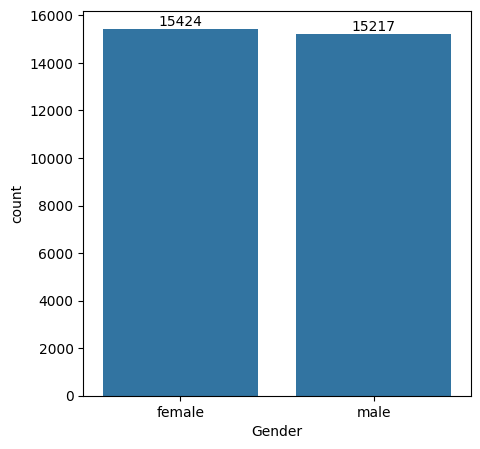

In [32]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data=df_cleaned,x='Gender')
ax.bar_label(ax.containers[0])
plt.show()

In [37]:
gb=df_cleaned.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
missing             66.645528     69.225474     68.295935
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


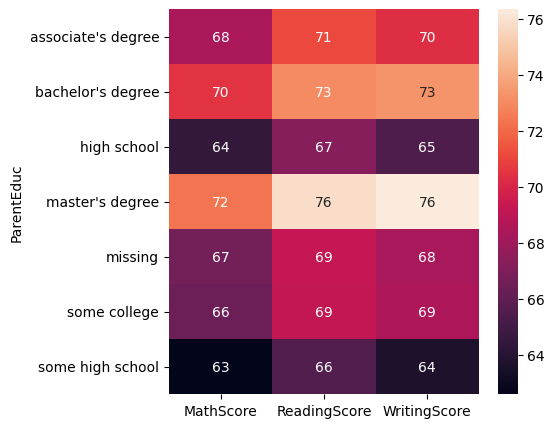

In [40]:
plt.figure(figsize=(5,5))
sns.heatmap(gb,annot=True)
plt.show()

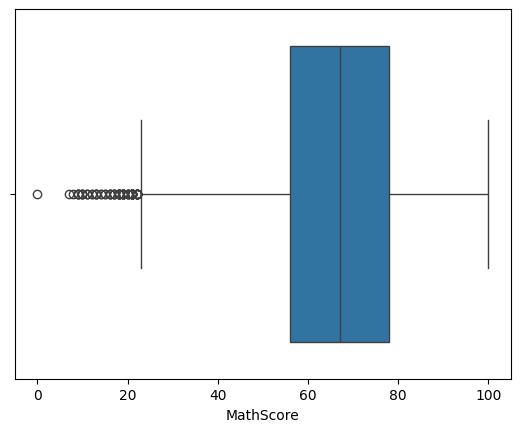

In [41]:
sns.boxplot(data=df_cleaned,x="MathScore")
plt.show()

## DISTRIBUTION OF ETHNIC GROUPS

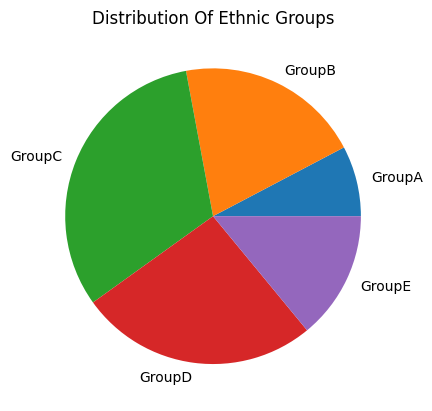

In [57]:
groupA=df_cleaned.loc[(df['EthnicGroup']=="group A")].count()
groupB=df_cleaned.loc[(df['EthnicGroup']=="group B")].count()
groupC=df_cleaned.loc[(df['EthnicGroup']=="group C")].count()
groupD=df_cleaned.loc[(df['EthnicGroup']=="group D")].count()
groupE=df_cleaned.loc[(df['EthnicGroup']=="group E")].count()


l=['GroupA','GroupB','GroupC','GroupD','GroupE']
my_list=[groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup'],]
plt.pie(my_list,labels=l);
plt.title("Distribution Of Ethnic Groups")
plt.show()

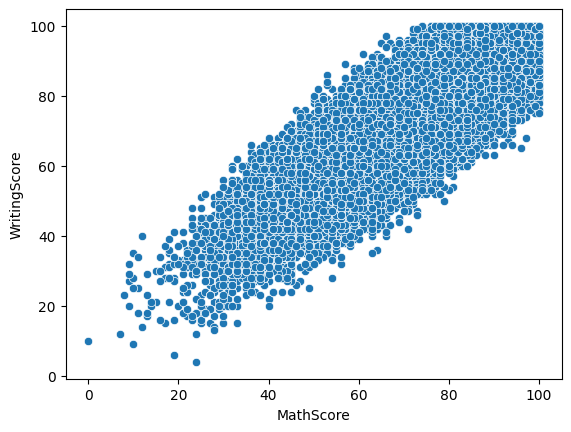

In [59]:
sns.scatterplot(data=df_cleaned,x="MathScore",y="WritingScore")
plt.show()